# Наиболее прослушиваемые треки на Spotify в 2024 году

##### **Описание проекта**
В нашем наборе данных есть 29 показателей, включающих лайки, репосты, просмотры, добавления в плейлист и т.д. Представим, что у нашего заказчика есть сайт для скачивания музыки.

##### **Цель проекта**
Цель работы заключается в том, чтобы определить какие исполнители, треки и альбомы являются наиболее востребованными у аудитории на различных платформах для последующего их добавления в базу сайта заказчика, а также его таргетинговой рекламы.

##### **Задачи:**
* Определить 10 наиболее популярных треков по общим показателям, таким как All Time Rank и Track Score и не имеющих возрастного ограничения.
* Отсортировать популярные треки из пункта 1 и сформировать удобную таблицу с названиями треков, альбомов, исполнителей, датами релиза, и ISRC.
* Построить диаграмму, показывающую как год выпуска треков влияет на их популярность в 2024 году.
* Построить диаграмму, показывающую какие исполнители выпустили больше всего популярных в 2024 году треков.
* Вывести статистики по исполнителям из пункта 4.
* Установить влияет ли наличие возрастного ограничения на популярность треков в 2024 году на разных платформах.
* Определить наиболее популярные треки на каждой из платформ по каждому из показателей. Объединить их в одну таблицу как в пункте 2.

##### **Структура проекта:**
* Загрузка и обработка данных
* Создание таблиц
  - Создание таблицы с 10 наиболее популярными в 2024 году треками, не имеющими возрастного ограничения
  - Создание таблицы статистик по исполнителям¶
  - Создание таблицы наиболее популярных треков на различных платформах по различным показателям
* Создание диаграмм
  - Количество популярных в 2024 году треков в зависимости от года выпуска
  - Количество популярных в 2024 году треков различных исполнителей
  - Сумма показателей каждой из платформ при отсутствии и наличии возрастного ограничения
* Выводы

## Загрузка и обработка данных

In [10]:
# Импорт необходимых библиотек и данных
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='unicode_escape')
df.head(10)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
5,Lovin On Me,Lovin On Me,Jack Harlow,11/10/2023,USAT22311371,6,410.1,"670,665,438","105,892","175,421,034",...,"4,654",86.0,"17,167,254",152.0,"138,529,362","50,982","9,438,601","4,517,131",NaN,1
6,Beautiful Things,Beautiful Things,Benson Boone,1/18/2024,USWB12307016,7,407.2,"900,158,751","73,118","201,585,714",...,429,168.0,"48,197,850",154.0,"65,447,476","57,372",NaN,"9,990,302",NaN,0
7,Gata Only,Gata Only,FloyyMenor,2/2/2024,QZL382406049,8,375.8,"675,079,153","40,094","211,236,940",...,30,87.0,"33,245,595",53.0,"3,372,428","5,762",NaN,"6,063,523",NaN,1
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,6/9/2024,TCJPA2463708,9,355.7,"1,653,018,119",1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,BAND4BAND (feat. Lil Baby),BAND4BAND (feat. Lil Baby),Central Cee,5/23/2024,USSM12404354,10,330.6,"90,676,573","10,400","184,199,419",...,117,78.0,"10,800,098",92.0,"1,005,626",842,"3,679,709","666,302",NaN,1


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4600 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4600 non-null   object        
 8   Spotify Playlist Count      4600 non-null   object        
 9   Spotify Playlist Reach      4600 non-null   object        
 10  Spotify Popularity          4600 non-null   float64       
 11  YouTube Views               4600 non-null   object      

    Мы можем заметить несколько проблем:
* В нашем наборе данных есть отсутствующие значения, причём у такого показателя как TIDAL Pooularity отсутствуют все значения.
* Столбцы с датами, названиями треков, альбомов и исполнителей имеют тип данных object.
* Некоторые числовые показатели имеют запятые для удобства их чтения, однако из-за этого они также имеют тип данных object.
* Не все названия отображаются корректно.

In [12]:
# Заменяем данные типа object в столбце 'Release Date' на тип Timestamp
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Заменяем данные в столбцах с названиями на тип string
list_1 = [df.columns[i] for i in range(3)]
list_2 = [df[df.columns[i]].astype('str') for i in range(3)]
df[list_1] = pd.DataFrame(list_2).T

# Убираем пустой столбец
df = df.drop(['TIDAL Popularity'], axis=1)

# Заменяем на отсутствующие значения на нули
df = df.fillna(0)
# В данном случае это оправдано, поскольку по показателям, содержащим значения NaN, статистики рассчитывать не требуется

In [14]:
# Создаём функцию, которая убирает запятые и преобразует данные в тип integer
def cangetype(dframe, start, end):

    for i in dframe.columns[start:end]:
        
        if dframe[i].dtype != 'O':
            continue

        dframe[i] = pd.DataFrame(dframe[i].str.replace(",",""))
        dframe[i] = dframe[i].fillna(0).astype('int64')
        
    return dframe

In [16]:
df = cangetype(df, 5, df.columns.value_counts().sum())

## Создание таблиц

#### Создание таблицы с 10 наиболее популярными в 2024 году треками, не имеющими возрастного ограничения

In [24]:
# Создадим новые переменные, которым присвоим по 10 отсортированных по требуемым показателям значений
# Также создадим маску "df['Explicit Track'] == 0", которая позволит нам отфильтровать строки, содержащие треки с возрастным ограничением
df_ATR = df[df['Explicit Track'] == 0].sort_values(by=['All Time Rank']).head(10)
df_TS = df[df['Explicit Track'] == 0].sort_values(by=['Track Score'], ascending=False).head(10)

# Проверка совместимости df_ATR и df_TS
df_common = df_ATR if np.all(df_ATR.index) == np.all(df_TS.index) else print(f'объекты DataFrame не совпадают по своим значениям')
df_common

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,196631588,...,40975,684,62.0,17598718,114.0,18004655,22931,4818457,2669262,0
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,211607669,...,74333,536,136.0,36321847,172.0,5022621,5639,7208651,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,136569078,...,1474799,2182,264.0,24684248,210.0,190260277,203384,0,11822942,0
6,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016,7,407.2,900158751,73118,201585714,...,383478,429,168.0,48197850,154.0,65447476,57372,0,9990302,0
12,LUNCH,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401991,13,316.3,221636195,13800,197280692,...,41344,45,138.0,38243636,163.0,1354692,1219,1313357,450344,0
14,bathroom floor,bathroom floor,Kids With Buns,2022-10-07,NLC242100307,15,301.6,297185,277,24445,...,1057,0,0.0,0,0.0,0,0,0,3288,0
16,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401028,17,297.6,395433400,12784,177932568,...,129968,3,99.0,37988531,134.0,9961769,13437,377734,1210029,0
18,BLUE,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401996,19,292.6,91272461,6499,52287548,...,181,1,24.0,5054005,33.0,283089,162,975891,257661,0
19,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612,20,292.0,3301814535,407119,169783402,...,1777811,4909,330.0,12907852,189.0,132624772,79909,0,14967379,0
24,Future,Future,official sound studio,2024-01-10,RUA1H2415548,25,277.5,0,1,2,...,0,0,0.0,0,0.0,0,0,0,0,0


In [22]:
Common = df_common.drop(df.iloc[:,5:], axis=1) # убираем лишние столбцы
Common.index = [str(i) for i in np.arange(1, df_common.index.value_counts().sum()+1)] # замена индексов
Common.to_excel('Common.xlsx')

# В итоге получаем таблицу, содержащую 10 наиболее популярных треков как по "All Time Rank" так и по "Track Score"
Common

,Track,Album Name,Artist,Release Date,ISRC
1,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777
4,Beautiful Things,Beautiful Things,Benson Boone,2024-01-18,USWB12307016
5,LUNCH,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401991
6,bathroom floor,bathroom floor,Kids With Buns,2022-10-07,NLC242100307
7,Fortnight (feat. Post Malone),THE TORTURED POETS DEPARTMENT,Taylor Swift,2024-04-18,USUG12401028
8,BLUE,HIT ME HARD AND SOFT,Billie Eilish,2024-05-17,USUM72401996
9,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612
10,Future,Future,official sound studio,2024-01-10,RUA1H2415548


    Наиболее популярными треками, не имеющими возрастного ограничения, как по показателю All Time Rank, так и по показателю Track Score в 2024 году стали: "MILLION DOLLAR BABY" Tommy Richman, "i like the way you kiss me" Artemas, "Flowers" Miley Cyrus, "Beautiful Things" Benson Boone, "LUNCH" Billie Eilish, "bathroom floor" Kids With Buns, "Fortnight (feat. Post Malone)" Taylor Swift, "BLUE" Billie Eilish, "As It Was" Harry Styles и "Future" official sound studio.

#### Создание таблицы статистик по исполнителям

In [458]:
num = []
for i in df['Artist'].value_counts().nlargest(10).index:
    a = round((df.loc[df[df['Artist'] == i].index, ['Track Score']]).describe(percentiles=[]), 2)
    num.append(a)
n = pd.concat(num, axis=1) # Объеденяем полученные в цикле объекты
n.columns = [df['Artist'].value_counts().nlargest(10).index]
n.to_excel('statistics.xlsx')
n

Artist,Taylor Swift,Drake,Bad Bunny,KAROL G,The Weeknd,Travis Scott,Billie Eilish,Ariana Grande,Future,Peso Pluma
count,63.00,63.00,60.00,32.00,31.00,30.00,27.00,26.00,23.00,22.00
mean,40.90,45.58,47.30,52.34,48.69,47.33,82.26,51.28,62.96,51.41
std,40.36,28.02,36.58,38.67,36.83,32.51,81.52,48.93,65.27,31.49
min,19.70,20.10,19.60,19.60,20.50,19.90,19.60,19.50,19.70,19.60
50%,28.20,33.20,32.20,33.95,38.00,38.35,54.70,33.30,33.80,41.95
max,297.60,122.70,184.80,167.80,194.00,139.50,316.30,262.80,308.20,153.10


    Исходя из полученных значений можно сделать вывод, что наиболее продуктивным исполнителем в 2024 году является Billie Eilish. Медианное и среднее значения у неё наиболее высокие. Это означает, что среди всех её треков большее количество имеет высокие показатели Track Score. Также, у Billie Eilish высокое значение стандартного отклонения, что свидетельствует о наличии как треков с очень низким рейтингом, так и треков с очень высоким рейтингом.
    У такого исполнителя как Drake значение стандартного отклонения наиболее низкое, что говорит о стабильно высоких рейтингах его треков, при этом Track Score наиболее популярных его треков существенно ниже чем у других исполнителей.

#### Создание таблицы наиболее популярных треков на различных платформах по различным показателям

In [456]:
a = []
for i in df.columns[7:-1]:

    if i == 'Soundcloud Streams':
        t = df[df['Explicit Track'] == 0].sort_values(i, ascending=False).head(1)[df.columns[:5]]
    else:
        t = df.sort_values(i, ascending=False).head(1)[df.columns[:5]]
        
    t.index = [i]*t.index.nunique()
    a.append(t)
    
result = pd.concat(a, axis=0)
result['Track']['TikTok Posts'] = 'Laxed (Siren Beat)'
result['Album Name']['YouTube Views'] = '-'
result.to_excel('result.xlsx')
result

/tmp/ipykernel_17793/3105555305.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Track']['TikTok Posts'] = 'Laxed (Siren Beat)'
/tmp/ipykernel_17793/3105555305.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Album Name']['YouTube Views'] = '-'


,Track,Album Name,Artist,Release Date,ISRC
Spotify Streams,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,USUG11904206
Spotify Playlist Count,Blinding Lights,Blinding Lights,The Weeknd,2019-11-29,USUG11904206
Spotify Playlist Reach,Espresso,Espresso,Sabrina Carpenter,2024-04-12,USUM72403305
Spotify Popularity,A Bar Song (Tipsy),A Bar Song (Tipsy),Shaboozey,2024-04-12,USUYG1541249
YouTube Views,Baby Shark,-,Pinkfong,2015-12-01,KRE671700001
YouTube Likes,Dynamite,Dynamite,BTS,2020-08-21,QM7282022872
TikTok Posts,Laxed (Siren Beat),Laxed (Siren Beat),Jawsh 685,2020-04-24,NZAM02001128
TikTok Likes,Monkeys Spinning Monkeys,SteamFun - Single,Kevin MacLeod,2011-05-16,USUAN1400011
TikTok Views,Monkeys Spinning Monkeys,SteamFun - Single,Kevin MacLeod,2011-05-16,USUAN1400011
YouTube Playlist Reach,As It Was,As It Was,Harry Styles,2022-03-31,USSM12200612


    Интересный факт. С детской песней Baby Shark, ставшей самой просматриваемой на youtube в 2024 году, был связан криминальный инцидент. Сотрудники тюрьмы округа Оклахома в США, пытали этой песней заключённых, за что в 2020 году им были предъявлены обвинения в жестоком обращении с ними.

## Создание диаграмм

#### Количество популярных в 2024 году треков в зависимости от года выпуска

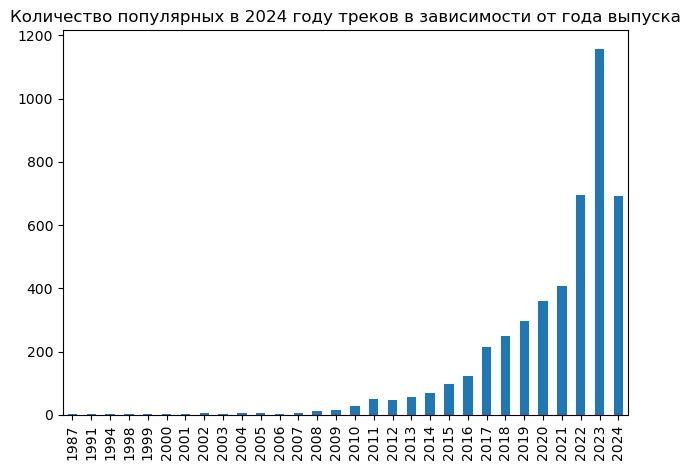

In [433]:
df['Release Date'].dt.year.value_counts().sort_index().plot.bar()
plt.xlabel('')
plt.title('Количество популярных в 2024 году треков в зависимости от года выпуска')
plt.tight_layout()
plt.savefig('Release Date.jpeg',bbox_inches='tight', dpi=300)

    На диаграмме можно видеть, что наибольшее количество популярных в 2024 году треков было выпущено за последние три года. Изменение количества популярных в 2024 году треков в зависимости от года их выпуска носит экспоненциальный характер, исключая последний год выпуска. Это исключение может быть объяснено отсутствием достаточного количества данных за 2024 год на момент их публикации.

#### Количество популярных в 2024 году треков различных исполнителей

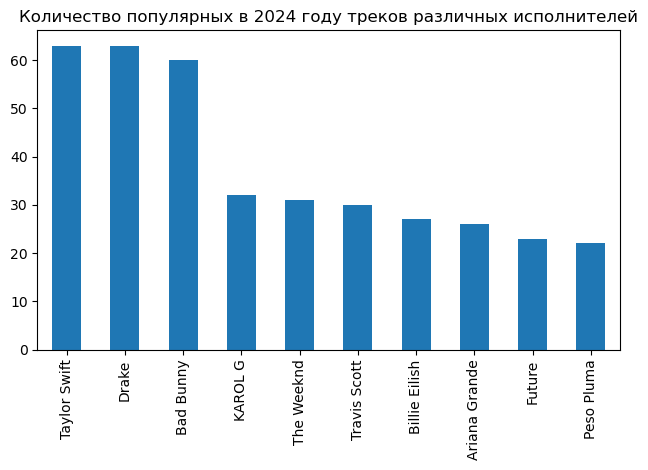

In [435]:
df['Artist'].value_counts().nlargest(10).plot.bar() # считаем количество повторений артистов в нашем наборе данных, 
                                                    # выбираем из полученного ряда 10, имеющих наибольшее количество повторений
                                                    # и рисуем столбчатую диаграмму.
plt.title('Количество популярных в 2024 году треков различных исполнителей')
plt.xlabel('')
plt.tight_layout()
plt.savefig('Artist efficiency.jpeg',bbox_inches='tight', dpi=300)

    Наибольшее количество треков, попавших в рейтинги 2024 года, было выпущено такими исполнителями как: Taylor Swift, Drake, Bad Bunny, KAROL G, The Weeknd, Travis Scott, Billie Eilish, Ariana Grande, Future и Peso Pluma. Особой продуктивностью отличились первые три исполнителя.

#### Сумма показателей каждой из платформ при отсутствии и наличии возрастного ограничения

In [443]:
Bar = df.dropna().groupby('Explicit Track')[df.columns[7:-1]].sum()

Bar1 = Bar.iloc[:, :4].sum(axis=1).to_frame()
Bar1.columns = ['Spotify']
Bar2 = (Bar.iloc[:, 4:6].sum(axis=1) + Bar.iloc[:, 9]).to_frame()
Bar2.columns = ['YouTube']
Bar3 = Bar.iloc[:, 6:9].sum(axis=1).to_frame()
Bar3.columns = ['TikTok']
Bar4 = Bar.iloc[:, 13:15].sum(axis=1).to_frame()
Bar4.columns = ['Deezer']
Bar5 = Bar.iloc[:, 16:18].sum(axis=1).to_frame()
Bar5.columns = ['Pandora']

Bar = pd.concat([Bar1, Bar2, Bar3, Bar5, Bar4, Bar['AirPlay Spins'].rename('AirPlay'), 
                 Bar['Apple Music Playlist Count'].rename('Apple Music'), Bar['SiriusXM Spins'].rename('SiriusXM'), 
                 Bar['Amazon Playlist Count'].rename('Amazon'), Bar['Soundcloud Streams'].rename('Soundcloud'), 
                 Bar['Shazam Counts'].rename('Shazam')], axis=1)

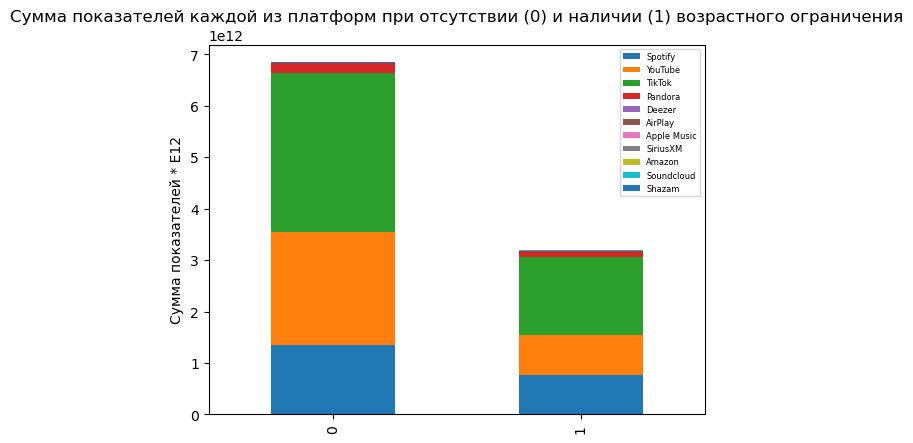

In [487]:
Bar.plot.bar(stacked=True)
plt.title('Сумма показателей каждой из платформ при отсутствии (0) и наличии (1) возрастного ограничения')
plt.ylabel('Сумма показателей * E12')
plt.xlabel('')
plt.legend(prop={'size' : 6})
plt.savefig('Exp_track_1.jpeg',bbox_inches='tight', dpi=300)

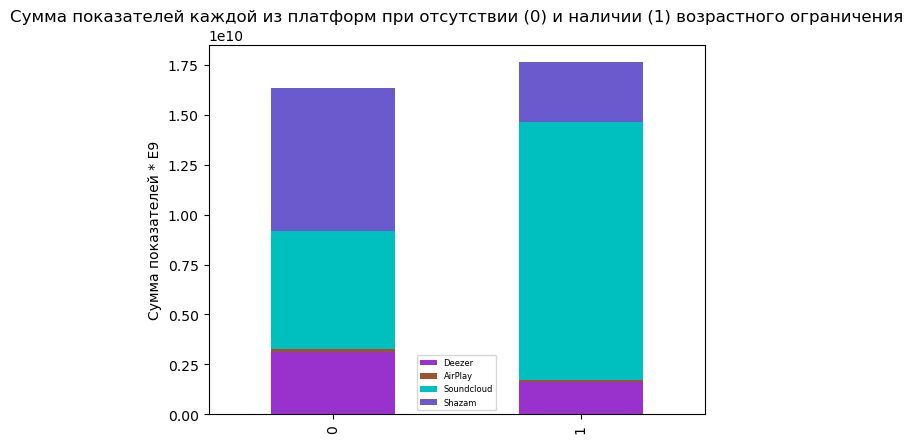

In [489]:
pd.concat([Bar.iloc[:, 4:6], Bar.iloc[:, 9:]], axis=1).plot.bar(stacked=True, color=['darkorchid', 'sienna', 'c', 'slateblue'])
plt.title('Сумма показателей каждой из платформ при отсутствии (0) и наличии (1) возрастного ограничения')
plt.ylabel('Сумма показателей * E9')
plt.xlabel('')
plt.legend(prop={'size' : 6})
plt.savefig('Exp_track_2.jpeg',bbox_inches='tight', dpi=300)

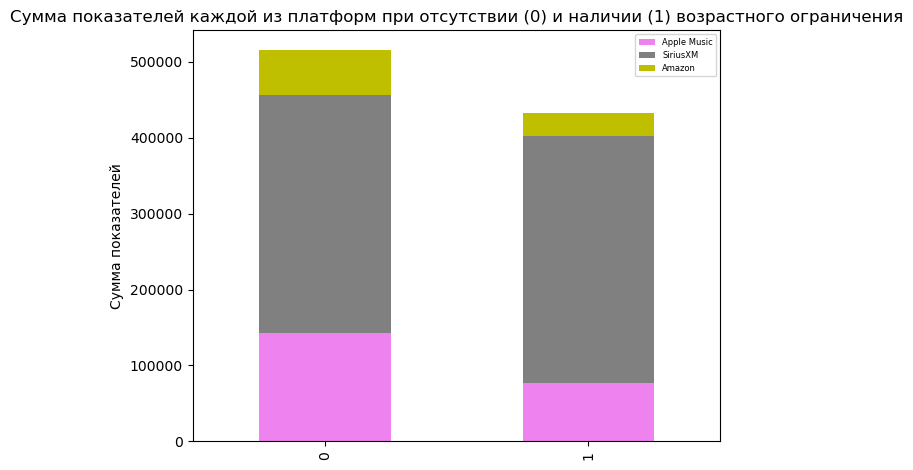

In [491]:
Bar.iloc[:, 6:9].plot.bar(stacked=True, color=['violet', 'grey', 'y'])
plt.title('Сумма показателей каждой из платформ при отсутствии (0) и наличии (1) возрастного ограничения')
plt.ylabel('Сумма показателей')
plt.xlabel('')
plt.legend(prop={'size' : 6})
plt.tight_layout()
plt.savefig('Exp_track_3.jpeg', bbox_inches='tight', dpi=300)

    Приведённые диаграммы показывают, что на преобладающем большинстве платформ, наибольшей популярностью обладают треки не имеющие возрастного ограничения. Исключение составляют такие платформы как SiriusXM и особенно SoundCloud.

## Выводы:

* Наиболее популярными треками, не имеющими возрастного ограничения, как по показателю All Time Rank, так и по показателю Track Score в 2024 году стали: "MILLION DOLLAR BABY" Tommy Richman, "i like the way you kiss me" Artemas, "Flowers" Miley Cyrus, "Beautiful Things" Benson Boone, "LUNCH" Billie Eilish, "bathroom floor" Kids With Buns, "Fortnight (feat. Post Malone)" Taylor Swift, "BLUE" Billie Eilish, "As It Was" Harry Styles и "Future" official sound studio.
    
* На диаграмме года выпуска трека можно видеть, что наибольшее количество популярных в 2024 году треков было выпущено за последние три года. Изменение количества популярных в 2024 году треков в зависимости от года их выпуска носит экспоненциальный характер, исключая последний год выпуска. Это исключение может быть объяснено отсутствием достаточного количества данных за 2024 год на момент их публикации.
    
* Наибольшее количество треков, попавших в рейтинги 2024 года, было выпущено такими исполнителями как: Taylor Swift, Drake, Bad Bunny, KAROL G, The Weeknd, Travis Scott, Billie Eilish, Ariana Grande, Future и Peso Pluma. Особой продуктивностью отличились первые три исполнителя.
    
* Исходя из полученных значений можно сделать вывод, что наиболее продуктивным исполнителем в 2024 году является Billie Eilish. Медианное и среднее значения у неё наиболее высокие. Это означает, что среди всех её треков большее количество имеет высокие показатели Track Score. Также, у Billie Eilish высокое значение стандартного отклонения, что свидетельствует о наличии как треков с очень низким рейтингом, так и треков с очень высоким рейтингом. У такого исполнителя как Drake значение стандартного отклонения наиболее низкое, что говорит о стабильно высоких рейтингах его треков, при этом Track Score наиболее популярных его треков существенно ниже чем у других исполнителей.
    
* Диаграммы сумм показателей демонстрируют, что на преобладающем большинстве платформ, наибольшей популярностью обладают треки не имеющие возрастного ограничения. Исключение составляют такие платформы как SiriusXM и особенно SoundCloud.

* Были определены наиболее популярные треки на каждой из платформ по каждому из показателей. Например, по такому показателю как Spotify Streams наиболее популярным стал трек "Blinding Lights". Результаты были объеденины в таблицу "result.xlsx"